In [13]:
# ========================================
# 📊 CONSENSUS: EREDMIÉNY + TEXT AGGREGÁLT ÁTLAG - JAVÍTOTT
# ========================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from collections import Counter

DATA_DIR = "../data/"

# 🔧 BEOLVASÁS
consensus_df = pd.read_csv(os.path.join(DATA_DIR, 'consensus.csv'), names=['text', 'rating'])
consensus_df['rating'] = pd.to_numeric(consensus_df['rating'], errors='coerce')
consensus_df = consensus_df.dropna(subset=['rating'])  # NaN-ok eltávolítása

print(f"📊 Consensus: {len(consensus_df):,} érvényes sor")

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

📊 Consensus: 2,591 érvényes sor


C:\Users\Bendi\AppData\Local\Temp\ipykernel_9616\1566213131.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


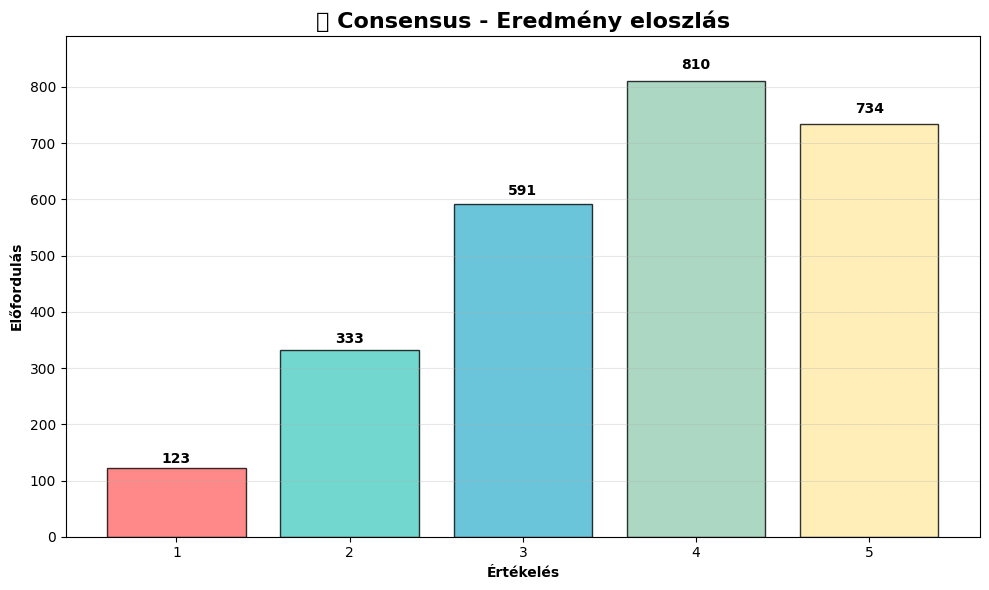

In [14]:
# ========================================
# 1️⃣ EREDMIÉNY ELOSZLÁS (OSZLOP DIAGRAM)
# ========================================
plt.figure(figsize=(10, 6))
raw_counts = consensus_df['rating'].value_counts().sort_index()
bars = plt.bar(raw_counts.index.astype(int), raw_counts.values, 
               color=colors, alpha=0.8, edgecolor='black')
plt.title('📊 Consensus - Eredmény eloszlás', fontweight='bold', fontsize=16)
plt.xlabel('Értékelés', fontweight='bold')
plt.ylabel('Előfordulás', fontweight='bold')
plt.ylim(0, max(raw_counts.values)*1.1)
plt.grid(axis='y', alpha=0.3)

for bar, value in zip(bars, raw_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height()*1.02,
             f'{int(value):,}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


🔍 TEXT AGGREGÁLÁS...


C:\Users\Bendi\AppData\Local\Temp\ipykernel_9616\319433719.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


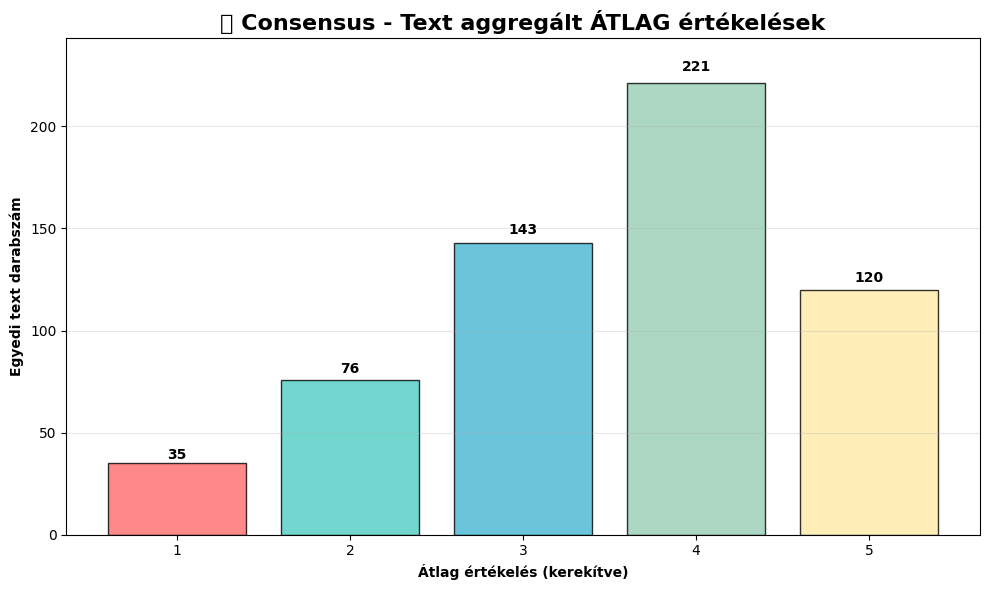

In [15]:
# ========================================
# 2️⃣ TEXT ALAPÚ AGGREGÁLT ÁTLAG (OSZLOP DIAGRAM) - HIBAJAVÍTOTT
# ========================================
print("\n🔍 TEXT AGGREGÁLÁS...")

# Ugyanazon text átlag ratingje (NaN nélkül)
text_avg = consensus_df.groupby('text')['rating'].mean().reset_index()
text_avg.columns = ['text', 'avg_rating']

# 🔧 NaN kezelés + biztonságos kerekítés
text_avg = text_avg.dropna(subset=['avg_rating'])  # NaN átlagok eltávolítása
text_avg['avg_rating_round'] = text_avg['avg_rating'].round().clip(0, 5).astype(int)  # 0-5 közé korlátozás

plt.figure(figsize=(10, 6))
agg_counts = text_avg['avg_rating_round'].value_counts().sort_index()
bars = plt.bar(agg_counts.index.astype(int), agg_counts.values, 
               color=colors, alpha=0.8, edgecolor='black')
plt.title('📊 Consensus - Text aggregált ÁTLAG értékelések', fontweight='bold', fontsize=16)
plt.xlabel('Átlag értékelés (kerekítve)', fontweight='bold')
plt.ylabel('Egyedi text darabszám', fontweight='bold')
plt.ylim(0, max(agg_counts.values)*1.1)
plt.grid(axis='y', alpha=0.3)

for bar, value in zip(bars, agg_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height()*1.02,
             f'{int(value):,}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

In [16]:
# ========================================
# 📈 STATISZTIKÁK
# ========================================
print("\n" + "="*60)
print("📈 STATISZTIKÁK")
print("="*60)

print("\n📊 Eredmény eloszlás:")
print(raw_counts.astype(int))

print("\n📊 Aggregált (text átlag) eloszlás:")
print(agg_counts.astype(int))

print(f"\n📈 Átlagok:")
print(f"Eredmény:        {consensus_df['rating'].mean():.2f}")
print(f"Aggregált átlag: {text_avg['avg_rating'].mean():.2f}")

print(f"\n📊 Egyedi text-ek száma: {len(text_avg):,}")
print(f"📊 Összes sorok száma:   {len(consensus_df):,}")

print("\n✅ KÉT OSZLOP DIAGRAM KÉSZEN! (NaN hiba javítva)")
print("="*60)


📈 STATISZTIKÁK

📊 Eredmény eloszlás:
rating
1.0    123
2.0    333
3.0    591
4.0    810
5.0    734
Name: count, dtype: int64

📊 Aggregált (text átlag) eloszlás:
avg_rating_round
1     35
2     76
3    143
4    221
5    120
Name: count, dtype: int64

📈 Átlagok:
Eredmény:        3.66
Aggregált átlag: 3.53

📊 Egyedi text-ek száma: 595
📊 Összes sorok száma:   2,591

✅ KÉT OSZLOP DIAGRAM KÉSZEN! (NaN hiba javítva)
